# Projekt praktyczny (regresja)

## Zbiór danych *Life Expectancy Data.csv* następujące kolumny:
- Country - państwo\
- Status - kraj rozwijający się / rozwinięty\
- Life expectancy - oczekiwana długość życia w latach\
- Adult Mortality - śmiertelność wśród dorosłych, prawdopodobieństwo śmierci w wieku między 15 a 60 lat na 1000 osób\
- infant deaths - śmiertelnośc noworodków w przeliczeniu na 1000 urodzeń\
- Alcohol - konsumpcja alkoholu wśród osób 15+ [w litrach]\
- percentage expenditure - udział wydatków na sektor zdrowia w PKB per capita\
- Hepatitis B - udział zaszczepionych dzieci do 1 roku życia na WZW typu B\
- Measles - liczba odnotowanych przypadków zachorowań na odrę na 1000 mieszkańców\
- BMI\
- under-five deaths - liczba śmierci na 1000 dzieci poniżej 5 roku życia\
- Polio - udział zaszczepionych dzieci do 1 roku życia na Polio\
- Total expenditure - udział wydatków na sektor zdrowia w całości wydatków rządowych\
- Diphtheria - udział zaszczepionych dzieci do 1 roku życia na błonicę i krztusiec\
- HIV/AIDS - śmierci dzieci poniżej 5 roku życia na 1 000 żywych urodzeń spowodowane HIV/AIDS\
- GDP - PKB per capita\
- Population - liczba mieszkańców\
- thinness 1-19 years - rozpowszechnienie chudości w wieku 1 -19 lat\
- thinness 5-9 years - rozpowszechnienie chudości w wieku 5 - 9 lat\
- Income composition of resources - Wskaźnik rozwoju społecznego HDI Human Development Index\
- Schooling - liczba lat nauczania szkolnego\

# Celem projektu jest:
1. przygotowanie i analiza dostarczonych danych
2. budowa i analiza jakości modeli do prognozy oczekiwanej długości życia w latach
3. ocena opracowanych modeli

## Zaimportuj biblioteki

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

## Wczytaj plik *Life Expectancy Data.csv* oraz wyświetl kilka pierwszych wierszy



In [6]:
file_path = '/content/Life Expectancy Data.csv'

life_expectancy_df = pd.read_csv(file_path, sep=';')
life_expectancy_df.head()

,Country,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Albania,Developing,77.8,74.0,0,4.60,364.975229,99.0,0,58.0,...,99.0,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2
2,Algeria,Developing,75.6,19.0,21,NaN,0.000000,95.0,63,59.5,...,95.0,NaN,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
3,Angola,Developing,52.4,335.0,66,NaN,0.000000,64.0,118,23.3,...,7.0,NaN,64.0,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4
4,Antigua and Barbuda,Developing,76.4,13.0,0,NaN,0.000000,99.0,0,47.7,...,86.0,NaN,99.0,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9


# Preprocessing
- wyświetl rozmiar zbioru


In [7]:
nan_counts = life_expectancy_df.isna().sum()
nan_counts

Country                              0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                            177
percentage expenditure               0
Hepatitis B                          9
Measles                              0
BMI                                  2
under-five deaths                    0
Polio                                0
Total expenditure                  181
Diphtheria                           0
HIV/AIDS                             0
GDP                                 29
Population                          41
thinness 1-19 years                  2
thinness 5-9 years                   2
Income composition of resources     10
Schooling                           10
dtype: int64

- jesli występują kolumny z dużą lością NaN-ów usuń je

In [8]:
# Usuń kolumny z więcej niż 100 wartościami NaN
threshold = 100
columns_to_drop = nan_counts[nan_counts > threshold].index
life_expectancy_df.drop(columns=columns_to_drop, inplace=True)
life_expectancy_df.head()

,Country,Status,Life expectancy,Adult Mortality,infant deaths,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,Developing,65.0,263.0,62,71.279624,65.0,1154,19.1,83,6.0,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Albania,Developing,77.8,74.0,0,364.975229,99.0,0,58.0,0,99.0,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2
2,Algeria,Developing,75.6,19.0,21,0.000000,95.0,63,59.5,24,95.0,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
3,Angola,Developing,52.4,335.0,66,0.000000,64.0,118,23.3,98,7.0,64.0,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4
4,Antigua and Barbuda,Developing,76.4,13.0,0,0.000000,99.0,0,47.7,0,86.0,99.0,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9



- sprawdź ilość NaN-ów

In [9]:
row_nan_counts = life_expectancy_df.isna().sum(axis=1)
row_nan_stats = {
    'min': row_nan_counts.min(),
    'max': row_nan_counts.max(),
    'mean': row_nan_counts.mean()
}
print(row_nan_stats)

{'min': 0, 'max': 5, 'mean': 0.5737704918032787}


- sprawdź statystyki NaN-ów dla wierszy (m.in. jaka jest mininalna, maxymalna, srednia liczba nanów w wierszu). Jeśli są wiersze, dla których jest >=5 braki usuń je i zresetuj indexy

In [10]:
life_expectancy_df_cleaned = life_expectancy_df[row_nan_counts < 5].reset_index(drop=True)
print(life_expectancy_df_cleaned.head())

               Country      Status  Life expectancy  Adult Mortality  \
0          Afghanistan  Developing             65.0            263.0   
1              Albania  Developing             77.8             74.0   
2              Algeria  Developing             75.6             19.0   
3               Angola  Developing             52.4            335.0   
4  Antigua and Barbuda  Developing             76.4             13.0   

   infant deaths  percentage expenditure  Hepatitis B  Measles   BMI  \
0             62               71.279624         65.0     1154  19.1   
1              0              364.975229         99.0        0  58.0   
2             21                0.000000         95.0       63  59.5   
3             66                0.000000         64.0      118  23.3   
4              0                0.000000         99.0        0  47.7   

   under-five deaths  Polio  Diphtheria  HIV/AIDS           GDP  Population  \
0                 83    6.0        65.0       0.1    58

- wyświetl wiersze od 170 do 175

In [11]:
print(life_expectancy_df_cleaned.iloc[170:176])

                         Country      Status  Life expectancy  \
170                      Ukraine  Developing             71.3   
171         United Arab Emirates  Developing             77.1   
172  United Republic of Tanzania  Developing             61.8   
173     United States of America   Developed             79.3   
174                      Uruguay  Developing             77.0   
175                   Uzbekistan  Developing             69.4   

     Adult Mortality  infant deaths  percentage expenditure  Hepatitis B  \
170            195.0              4                     0.0         22.0   
171             75.0              1                     0.0         99.0   
172            279.0             85                     0.0         98.0   
173             13.0             23                     0.0         92.0   
174            116.0              0                     0.0         95.0   
175            184.0             15                     0.0         99.0   

     Measle

*   pozostałe NaN-y uzupełnij średnią

In [12]:
numeric_columns = life_expectancy_df_cleaned.select_dtypes(include=['float64', 'int64']).columns
life_expectancy_df_cleaned[numeric_columns] = life_expectancy_df_cleaned[numeric_columns].fillna(life_expectancy_df_cleaned[numeric_columns].mean())
print(life_expectancy_df_cleaned.iloc[170:176])

                         Country      Status  Life expectancy  \
170                      Ukraine  Developing             71.3   
171         United Arab Emirates  Developing             77.1   
172  United Republic of Tanzania  Developing             61.8   
173     United States of America   Developed             79.3   
174                      Uruguay  Developing             77.0   
175                   Uzbekistan  Developing             69.4   

     Adult Mortality  infant deaths  percentage expenditure  Hepatitis B  \
170            195.0              4                     0.0         22.0   
171             75.0              1                     0.0         99.0   
172            279.0             85                     0.0         98.0   
173             13.0             23                     0.0         92.0   
174            116.0              0                     0.0         95.0   
175            184.0             15                     0.0         99.0   

     Measle

*   oblicz statystyki opisowe


In [14]:
descriptive_stats = life_expectancy_df_cleaned.describe()

print(descriptive_stats)
life_expectancy_df_cleaned.info()

       Life expectancy  Adult Mortality  infant deaths  \
count       182.000000       182.000000     182.000000   
mean         71.564286       153.324176      23.917582   
std           8.114743        97.630430      83.900288   
min          51.000000         1.000000       0.000000   
25%          65.725000        74.250000       0.000000   
50%          73.750000       138.500000       2.000000   
75%          76.850000       214.000000      17.000000   
max          88.000000       484.000000     910.000000   

       percentage expenditure  Hepatitis B       Measles         BMI  \
count              182.000000   182.000000    182.000000  182.000000   
mean                 2.397005    82.425287   1510.659341   42.621667   
std                 27.536214    23.471921   7863.325029   20.551768   
min                  0.000000     6.000000      0.000000    2.500000   
25%                  0.000000    81.000000      0.000000   24.300000   
50%                  0.000000    92.000000   

# Wizualizacja

Wykonaj wykresy rozkładu (histogram i ramka-wąsy) zmiennej *Life expectancy* skategoryzowane w zalezności od statusu kraju. Zinterpretuj wyniki.

* Histogramy

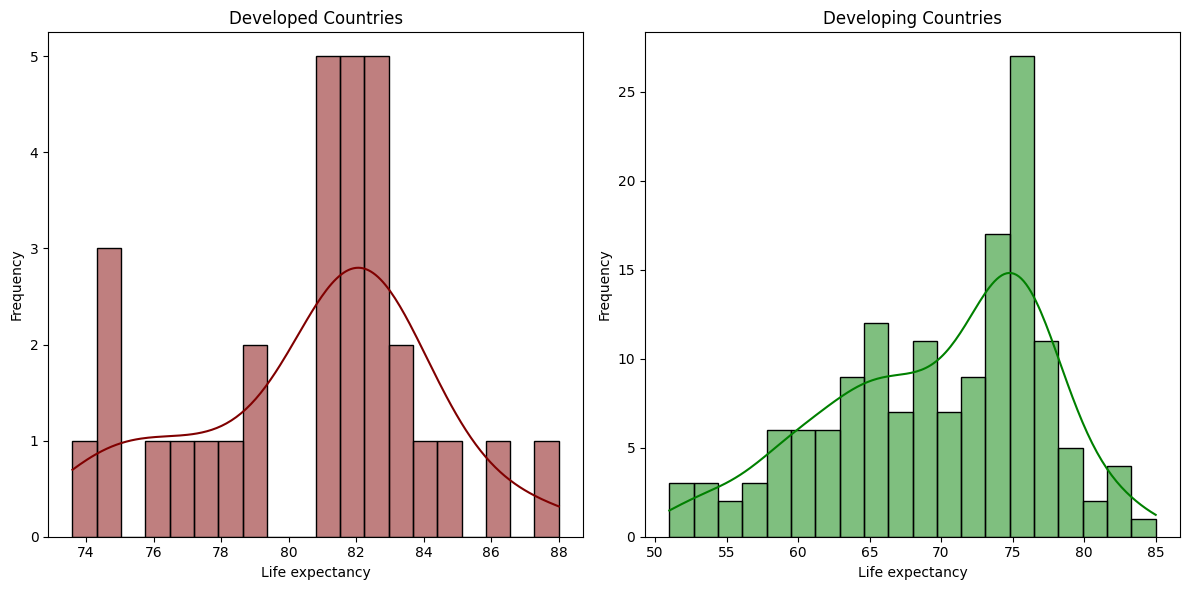

In [21]:
plt.figure(figsize=(12, 6))

# Histogram dla krajów rozwiniętych
plt.subplot(1, 2, 1)
sns.histplot(life_expectancy_df_cleaned[life_expectancy_df_cleaned['Status'] == 'Developed']['Life expectancy'], kde=True, bins=20, color='maroon')
plt.title('Developed Countries')
plt.xlabel('Life expectancy')
plt.ylabel('Frequency')

# Histogram dla krajów rozwijających się
plt.subplot(1, 2, 2)
sns.histplot(life_expectancy_df_cleaned[life_expectancy_df_cleaned['Status'] == 'Developing']['Life expectancy'], kde=True, bins=20, color='green')
plt.title('Developing Countries')
plt.xlabel('Life expectancy')
plt.ylabel('Frequency')

# Wyświetlenie wykresów
plt.tight_layout()
plt.show()

* Ramka-wąsy

<ipython-input-22-9e48397b87c0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Status', y='Life expectancy', data=life_expectancy_df_cleaned, palette=['maroon', 'green'])


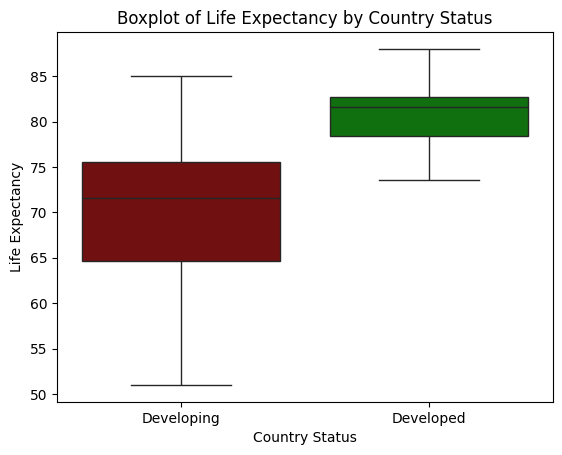

In [22]:
# Boxplot
sns.boxplot(x='Status', y='Life expectancy', data=life_expectancy_df_cleaned, palette=['maroon', 'green'])

# Tytuł i etykiety osi
plt.title('Boxplot of Life Expectancy by Country Status')
plt.xlabel('Country Status')
plt.ylabel('Life Expectancy')

# Wyświetlenie wykresu
plt.show()

# Korelacja
Wykonaj macierz korelacji dla zmiennych ilościowych. Z którymi zmiennymi skorelowana jest zmienna *Life expectancy*. Zinterpretuj te korelacje.

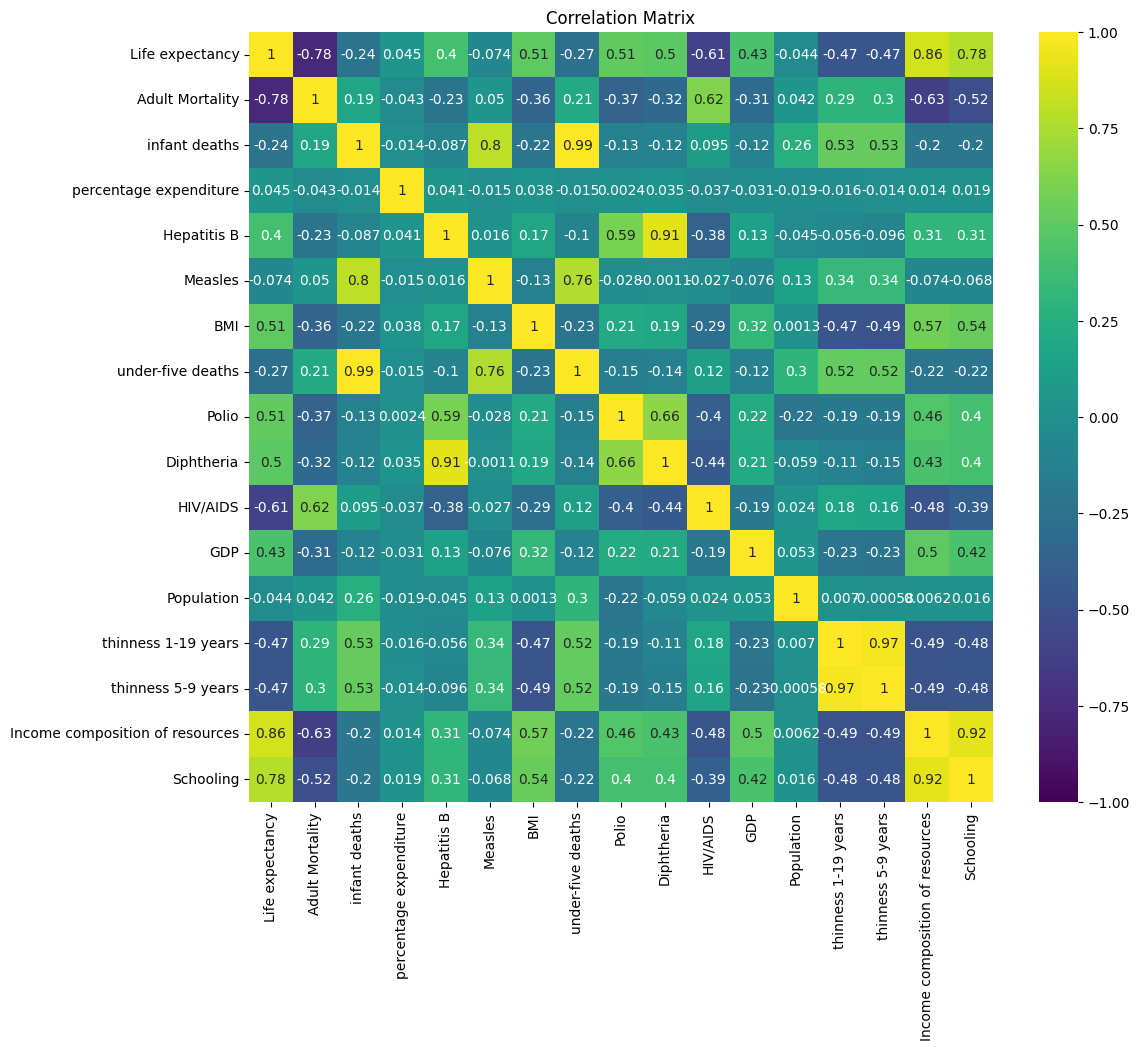

Life expectancy                    1.000000
Income composition of resources    0.864762
Schooling                          0.779746
Polio                              0.514539
BMI                                0.507324
Diphtheria                         0.499242
GDP                                0.426411
Hepatitis B                        0.400029
percentage expenditure             0.044703
Population                        -0.043955
Measles                           -0.073734
infant deaths                     -0.240637
under-five deaths                 -0.271345
thinness 5-9 years                -0.466594
thinness 1-19 years               -0.466750
HIV/AIDS                          -0.608261
Adult Mortality                   -0.778098
Name: Life expectancy, dtype: float64


In [26]:
# Wybór zmiennych ilościowych
numeric_columns = life_expectancy_df_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Obliczenie macierzy korelacji
correlation_matrix = life_expectancy_df_cleaned[numeric_columns].corr()

# Wyświetlenie macierzy korelacji
correlation_matrix

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# Korelacja zmiennych ze zmienną 'Life expectancy'
life_expectancy_correlation = correlation_matrix['Life expectancy'].sort_values(ascending=False)
print(life_expectancy_correlation)

### Interpretacja wyników korelacji

1. **Income composition of resources (0.864762)**
   - Bardzo wysoka dodatnia korelacja. Wskazuje to na silny związek pomiędzy wskaźnikiem rozwoju społecznego (HDI) a długością życia. Wyższy wskaźnik HDI jest zapewne związany z lepszymi warunkami życia, dostępem do edukacji, opieki zdrowotnej i innymi zasobami, które pozytywnie wpływają na długość życia.

2. **Schooling (0.779746)**
   - Wysoka dodatnia korelacja. Liczba lat edukacji jest silnie związana z oczekiwaną długością życia. Wyższy poziom edukacji może prowadzić do lepszego zrozumienia zdrowego stylu życia, lepszej opieki zdrowotnej i większej świadomości zdrowotnej.

3. **Polio (0.514539)**
   - Znacząca dodatnia korelacja. Wyższy wskaźnik szczepień przeciwko polio wskazuje na lepszą profilaktykę zdrowotną, co przekłada się na wyższą długość życia.

4. **BMI (0.507324)**
   - Znacząca dodatnia korelacja. Wyższe BMI może być wskaźnikiem lepszego odżywienia i ogólnego stanu zdrowia w populacji, co przyczynia się do dłuższej długości życia.

5. **Diphtheria (0.499242)**
   - Znacząca dodatnia korelacja. Wyższy wskaźnik szczepień przeciwko błonicy i krztuścowi również wskazuje na lepszą profilaktykę zdrowotną i wyższą długość życia.

6. **GDP (0.426411)**
   - Znacząca dodatnia korelacja. Wyższy PKB per capita jest związany z wyższym standardem życia, lepszą opieką zdrowotną i lepszym dostępem do zasobów, co wpływa na długość życia.

7. **Hepatitis B (0.400029)**
   - Znacząca dodatnia korelacja. Wyższy wskaźnik szczepień przeciwko WZW typu B wskazuje na lepszą opiekę zdrowotną i profilaktykę, co może przyczyniać się do wyższej długości życia.

8. **Percentage expenditure (0.044703)**
   - Bardzo niska dodatnia korelacja. Udział wydatków na sektor zdrowia w PKB per capita ma niewielki wpływ na długość życia, co może wynikać z innych czynników wpływających na zdrowie, takich jak efektywność wydatków.

9. **Population (-0.043955)**
   - Bardzo niska ujemna korelacja. Wielkość populacji nie ma istotnego wpływu na oczekiwaną długość życia.

10. **Measles (-0.073734)**
    - Niska ujemna korelacja. Wyższa liczba przypadków odry może być związana z gorszą profilaktyką zdrowotną, ale wpływ na długość życia jest niewielki.

11. **Infant deaths (-0.240637)**
    - Umiarkowana ujemna korelacja. Wyższa śmiertelność noworodków jest związana z niższą oczekiwaną długością życia, co wskazuje na problemy zdrowotne w populacji.

12. **Under-five deaths (-0.271345)**
    - Umiarkowana ujemna korelacja. Wyższa liczba zgonów dzieci poniżej 5 roku życia wskazuje na problemy zdrowotne i niższą jakość opieki zdrowotnej, co wpływa na długość życia.

13. **Thinness 5-9 years (-0.466594) i Thinness 1-19 years (-0.466750)**
    - Znaczące ujemne korelacje. Wyższy poziom chudości wśród dzieci i młodzieży wskazuje na problemy z odżywianiem, co negatywnie wpływa na zdrowie i długość życia.

14. **HIV/AIDS (-0.608261)**
    - Wysoka ujemna korelacja. Wyższy wskaźnik zgonów spowodowanych HIV/AIDS jest związany z niższą oczekiwaną długością życia, co odzwierciedla wpływ tej choroby na populację.

15. **Adult Mortality (-0.778098)**
    - Wysoka ujemna korelacja. Wyższa śmiertelność dorosłych jest związana z niższą oczekiwaną długością życia, co sugeruje problemy zdrowotne w populacji dorosłych.

### Podsumowanie
Korelacje wskazują, że długość życia jest silnie związana z wskaźnikami rozwoju społecznego i ekonomicznego oraz profilaktyką zdrowotną. Negatywnie wpływają na nią czynniki związane z problemami zdrowotnymi, takie jak wysoka śmiertelność noworodków i dorosłych, HIV/AIDS oraz problemy z odżywianiem. Wyniki te podkreślają znaczenie inwestycji w edukację, opiekę zdrowotną i profilaktykę, aby poprawić oczekiwaną długość życia.

# Regresja linowa jednej zmiennej
- Zbuduj model regresji liniowej prostej (jednej zmiennej) umozliwijący przewidywanie długości życia. Odpowiednio przygotuj X (zmienna objaśniająca) i y (zmienna objasniana).


In [41]:
# Dodanie nowych zmiennych objaśniających i przekształcenie GDP
X = life_expectancy_df_cleaned[['GDP', 'BMI', 'Income composition of resources']]
y = life_expectancy_df_cleaned['Life expectancy']

# Przekształcenie GDP
X['GDP_log'] = np.log1p(X['GDP'])
X.drop('GDP', axis=1, inplace=True)

# Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicjalizacja modelu regresji liniowej
linear_regressor = LinearRegression()

# Trenowanie modelu na zbiorze treningowym
linear_regressor.fit(X_train, y_train)

<ipython-input-41-1c76ed1f049b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['GDP_log'] = np.log1p(X['GDP'])
<ipython-input-41-1c76ed1f049b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop('GDP', axis=1, inplace=True)


LinearRegression()

- Wykonaj predykcję dla zbioru treningowego i testowego

In [42]:
# Predykcja na zbiorze treningowym
y_train_pred = linear_regressor.predict(X_train)

# Predykcja na zbiorze testowym
y_test_pred = linear_regressor.predict(X_test)

* Oblicz metryki (R2, MAE, MSE, RMSE)

In [43]:
# Obliczenie metryk
r2_train = r2_score(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)

r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)

# Wyświetlenie metryk
print(f"Metryki dla zbioru treningowego:\nR²: {r2_train}\nMAE: {mae_train}\nMSE: {mse_train}\nRMSE: {rmse_train}")
print(f"\nMetryki dla zbioru testowego:\nR²: {r2_test}\nMAE: {mae_test}\nMSE: {mse_test}\nRMSE: {rmse_test}")

Metryki dla zbioru treningowego:
R²: 0.7449696022274697
MAE: 2.7498079254074392
MSE: 15.96913743620189
RMSE: 3.9961403173814967

Metryki dla zbioru testowego:
R²: 0.7580304371596965
MAE: 3.347686557361021
MSE: 18.568019580920293
RMSE: 4.309062494431973


# Metryki dla zbioru treningowego:
* R² (Coefficient of Determination): 0.745 - oznacza to, że model wyjaśnia około 74.5% zmienności w danych, co jest relatywnie wysokim wynikiem. Możemy uznać, że model dobrze dopasował się do danych treningowych.
* MAE (Mean Absolute Error): 2.750 lat - średni redni błąd bezwzględny wynoszący 2.750 lat wskazuje, że średnio model przewiduje długość życia z błędem wynoszącym około 2.750 lat.
* MSE (Mean Squared Error): 15.969 - średni kwadratowy błąd wynoszący 15.969 oznacza, że średnia kwadratowa różnica między przewidywaną a rzeczywistą długością życia wynosi 15.969 lat.
* RMSE (Root Mean Squared Error): 3.996 lat - średni błąd kwadratowy pierwiastek wynoszący 3.996 lat oznacza, że średnio model przewiduje długość życia z błędem wynoszącym około 3.996 lat.

# Metryki dla zbioru testowego:
* R²: 0.758 - wartość R² dla zbioru testowego wynosząca 0.758 jest zbliżona do R² dla zbioru treningowego, co sugeruje, że model generalizuje dobrze na nowych danych.
* MAE: 3.348 lat - średni błąd bezwzględny dla zbioru testowego wynoszący 3.348 lat jest nieco większy niż dla zbioru treningowego, co sugeruje pewne przetrenowanie modelu, ale nadal jest na akceptowalnym poziomie.
* MSE: 18.568 - średni kwadratowy błąd dla zbioru testowego wynoszący 18.568 jest nieco większy niż dla zbioru treningowego, ale nadal utrzymuje się na akceptowalnym poziomie.
* RMSE: 4.309 lat - średni błąd kwadratowy pierwiastek dla zbioru testowego wynoszący 4.309 lat również jest nieco większy niż dla zbioru treningowego, ale nadal jest na akceptowalnym poziomie.

* Oceń jakość modelu (dobrze dopasowany, przetrenowany, niedotrenowany).

In [44]:
# Ocena jakości modelu
if r2_test > 0.7:
    print("Model jest dobrze dopasowany.")
elif r2_test < 0.3:
    print("Model jest niedotrenowany.")
else:
    print("Model jest średnio dopasowany.")

Model jest dobrze dopasowany.


# Podziel zbiór danych na zbiór treningowy i testowy w stodunku 80% do 20%.

In [45]:
# Zmienne objaśniające (X) i zmienna objaśniana (y)
X = life_expectancy_df_cleaned[['GDP', 'BMI', 'Income composition of resources']]
y = life_expectancy_df_cleaned['Life expectancy']

# Podział na zbiór treningowy i testowy w stosunku 80% do 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Wyświetlenie rozmiarów zbiorów treningowego i testowego
print("Rozmiar zbioru treningowego:", X_train.shape[0])
print("Rozmiar zbioru testowego:", X_test.shape[0])

Rozmiar zbioru treningowego: 145
Rozmiar zbioru testowego: 37


# Regresja linowa wielu zmiennych
- Zbuduj model regresji liniowej wielu zmiennych umozliwijący przewidywanie długości życia. Odpowiednio przygotuj X (zmienne objaśniające) i y (zmienna objasniana).

In [47]:
# Przygotowanie danych
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicjalizacja modelu regresji liniowej
linear_regressor = LinearRegression()

# Trenowanie modelu na danych treningowych
linear_regressor.fit(X_train, y_train)

LinearRegression()

- Wykonaj predykcję dla zbioru treningowego i testowego


In [48]:
# Predykcja dla zbioru treningowego i testowego
y_train_pred = linear_regressor.predict(X_train)
y_test_pred = linear_regressor.predict(X_test)

- Oblicz metryki (R2, MAE, MSE, RMSE).

In [49]:
# Obliczenie metryk dla zbioru treningowego
r2_train = r2_score(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)

# Obliczenie metryk dla zbioru testowego
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)

# Wyświetlenie metryk
print("Metryki dla zbioru treningowego:")
print("R²:", r2_train)
print("MAE:", mae_train)
print("MSE:", mse_train)
print("RMSE:", rmse_train)
print("\nMetryki dla zbioru testowego:")
print("R²:", r2_test)
print("MAE:", mae_test)
print("MSE:", mse_test)
print("RMSE:", rmse_test)

Metryki dla zbioru treningowego:
R²: 0.743957245937509
MAE: 2.7830600362040263
MSE: 16.032527749160607
RMSE: 4.004063904230376

Metryki dla zbioru testowego:
R²: 0.7538786776271682
MAE: 3.354524212120869
MSE: 18.886613173396782
RMSE: 4.3458731197996086


-  Oceń jakość modelu (dobrze dopasowany, przetrenowany, niedotrenowany).

In [50]:
# Ocena jakości modelu
if r2_test > 0.7:
    print("Model jest dobrze dopasowany.")
elif r2_test < 0.3:
    print("Model jest niedotrenowany.")
else:
    print("Model jest średnio dopasowany.")

Model jest dobrze dopasowany.


# Metryki dla zbioru treningowego:
- R²: 0.744 - model wyjaśnia około 74.4% zmienności w danych treningowych, co sugeruje, że dobrze dopasowuje się do danych treningowych.
- MAE: 2.783 lat - średni błąd bezwzględny wynoszący 2.783 lat oznacza, że przewidywania modelu różnią się od rzeczywistych wartości o średnio 2.783 lat.
- MSE: 16.033 - średni kwadratowy błąd wynoszący 16.033 oznacza, że średnia kwadratowa różnica między przewidywaniami modelu a rzeczywistymi wartościami wynosi 16.033 lat.
- RMSE: 4.004 lat - średni błąd kwadratowy pierwiastek wynoszący 4.004 lat oznacza, że przewidywania modelu różnią się od rzeczywistych wartości o średnio 4.004 lat.
# Metryki dla zbioru testowego:
- R²: 0.754 - model wyjaśnia około 75.4% zmienności w danych testowych, co sugeruje, że generalizuje dobrze na nowych danych testowych.
- MAE: 3.355 lat - średni błąd bezwzględny wynoszący 3.355 lat oznacza, że przewidywania modelu dla danych testowych różnią się od rzeczywistych wartości o średnio 3.355 lat.
- MSE: 18.887 - średni kwadratowy błąd wynoszący 18.887 oznacza, że średnia kwadratowa różnica między przewidywaniami modelu a rzeczywistymi wartościami dla danych testowych wynosi 18.887 lat.
- RMSE: 4.346 lat - średni błąd kwadratowy pierwiastek wynoszący 4.346 lat oznacza, że przewidywania modelu różnią się od rzeczywistych wartości dla danych testowych o średnio 4.346 lat.

# Podziel zbiór danych na zbiór treningowy i testowy w stodunku 80% do 20%.

In [51]:
# Podział zbioru danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Wyświetlenie rozmiarów zbiorów treningowego i testowego
print("Rozmiar zbioru treningowego:", X_train.shape[0])
print("Rozmiar zbioru testowego:", X_test.shape[0])

Rozmiar zbioru treningowego: 145
Rozmiar zbioru testowego: 37
